# SNEASY

This runs the SNEASY model and plots some variables.

## Dependencies

Load dependencies

In [1]:
using Mimi
using Gadfly

In [2]:
include("../src/doeclim.jl")
include("../src/ccm.jl")
include("../src/radforc.jl")

## Read and prep data from files

In [3]:
f_anomtable = readdlm("../data/anomtable.txt")
f_emissions = readdlm("../data/emis_data_sep09.txt")
f_nonco2forcing = readdlm("../data/non_CO2_forcing.txt")

CO2_emissions = vec(f_emissions[:,2])
other_forcing = vec(f_nonco2forcing[:,2])
anomtable = zeros(100, 16000)
for i=1:16000
    anomtable[:,i] = f_anomtable[i,:]
end

## Create model

Create the model object and set the number of timesteps.

In [4]:
m = Model()

setindex(m, :time, 566)

Add components to model

In [5]:
addcomponent(m, radforccomponent.radforc)
addcomponent(m, doeclimcomponent.doeclim)
addcomponent(m, ccmcomponent.ccm)    

Set parameters

In [6]:
setparameter(m, :doeclim, :t2co, 2.0)
setparameter(m, :doeclim, :kappa, 1.1)
setparameter(m, :doeclim, :deltat, 1.0)
    
setparameter(m, :ccm, :deltat, 1.0)
setparameter(m, :ccm, :Clim_sens, 2.0)
setparameter(m, :ccm, :Q10, 1.311)
setparameter(m, :ccm, :Beta, 0.502)
setparameter(m, :ccm, :Eta, 17.722)
setparameter(m, :ccm, :CO2_emissions, CO2_emissions)
setparameter(m, :ccm, :anomtable, anomtable)
    
setparameter(m, :radforc, :other_forcing, other_forcing)
setparameter(m, :radforc, :deltat, 1.0)

Connect components

In [7]:
connectparameter(m, :doeclim, :forcing, :radforc, :rf)
connectparameter(m, :ccm, :temp, :doeclim, :temp)
connectparameter(m, :radforc, :atmco2, :ccm, :atmco2)

## Run model

In [8]:
run(m)

## Plot results

In [9]:
set_default_plot_size(20cm, 15cm)

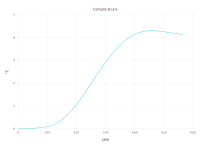

In [10]:
plot(
getdataframe(m, :doeclim, :temp), 
x="time", 
y="temp", 
Geom.line, 
Guide.xlabel("year"), 
Guide.ylabel("°C"), 
Guide.title("temperature")
)

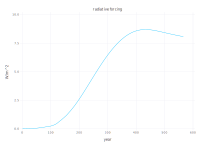

In [11]:
plot(
getdataframe(m, :radforc, :rf), 
x="time", 
y="rf", 
Geom.line, 
Guide.xlabel("year"), 
Guide.ylabel("W/m^2"), 
Guide.title("radiative forcing")
)

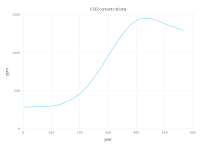

In [12]:
plot(
getdataframe(m, :ccm, :atmco2), 
x="time", 
y="atmco2", 
Geom.line, 
Guide.xlabel("year"), 
Guide.ylabel("ppm"), 
Guide.title("CO2 concentrations")
)